In [68]:
import cv2 as cv2
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

%matplotlib inline


In [69]:
Images = []
def readImagesFromFile(path):
    for filename in glob.glob(path):
        img = cv2.imread(filename)  # cv2.imread reads images in RGB format
        Images.append(img)


In [70]:
# def HV(bw):
#     # _,bw = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
#     edges = cv2.Canny(bw, 50, 150, apertureSize=3)
#     horizontal = np.copy(edges)
#     vertical = np.copy(edges)
#     # Specify size on horizontal axis
#     cols = horizontal.shape[1]
#     horizontal_size = cols // 30
#     # print(horizontal_size)
#     # Create structure element for extracting horizontal lines through morphology operations
#     horizontalStructure = cv2.getStructuringElement(
#         cv2.MORPH_RECT, (horizontal_size, 1))
#     # Apply morphology operations
#     horizontal = cv2.erode(horizontal, horizontalStructure)
#     horizontal = cv2.dilate(horizontal, horizontalStructure)
#     # Show extracted horizontal lines
#     # Specify size on vertical axis
#     rows = vertical.shape[0]
#     verticalsize = rows // 30
#     # Create structure element for extracting vertical lines through morphology operations
#     verticalStructure = cv2.getStructuringElement(
#         cv2.MORPH_RECT, (1, verticalsize))
#     # Apply morphology operations
#     vertical = cv2.erode(vertical, verticalStructure)
#     vertical = cv2.dilate(vertical, verticalStructure)

#     return horizontal,vertical


In [71]:
# f = open("test.txt", "a")

# pathes = [
#     "./ACDB/ACdata_base/1/*",
#     "./ACDB/ACdata_base/2/*",
#     "./ACDB/ACdata_base/3/*",
#     "./ACDB/ACdata_base/4/*",
#     "./ACDB/ACdata_base/5/*",
#     "./ACDB/ACdata_base/6/*",
#     "./ACDB/ACdata_base/7/*",
#     "./ACDB/ACdata_base/8/*",
#     "./ACDB/ACdata_base/9/*"
# ]
# for path in pathes:
#     i= 0
#     HIMG = []
#     VIMG = []
#     Images = []
#     print(path)
#     f.write(path)
#     f.write('\n')

#     Images = readImagesFromFile(path)
#     print(len(Images))
#     for img in Images:
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         _, bw = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
#         try:
#             h,v = HV(bw)
#             HIMG.append(h)
#             VIMG.append(v)
#         except:
#             i +=1
#     print("number of error images : ", i)
#     f.write("number of error images : " )
#     f.write(str(i))
#     f.write('\n')
#     # print("num",len(HIMG),len(VIMG))
#     vNumber = []
#     hNumber = []
#     for img in HIMG:
#         # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         num_labels, labels = cv2.connectedComponents(img)
#         vNumber.append(num_labels)
#     for img in VIMG:
#         # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         num_labels, labels = cv2.connectedComponents(img)
#         hNumber.append(num_labels)
#     feature = []
#     for i in range(0, len(vNumber)):
#         feature.append(vNumber[i]/hNumber[i])
#     feature = np.array(feature)
#     print("number of images",len(vNumber))
#     f.write("number of images :")
#     f.write(str(len(vNumber)))
#     f.write('\n')
#     print("number of images that not exceeded the  0.5 ratio :",len(feature[feature < 0.5]))
#     f.write("number of images that not exceeded the  0.5 ratio :")
#     f.write(str(len(feature[feature < 0.5])))
#     f.write('\n')
#     print("percentage of Images exceeded the ratio ",
#           (1-(len(feature[feature < 0.5])/len(vNumber)))*100,"%")
#     f.write("percentage of Images exceeded the ratio ")
#     f.write(str((1-(len(feature[feature < 0.5])/len(vNumber)))*100))
#     f.write("%")
#     f.write('\n')

# f.close()


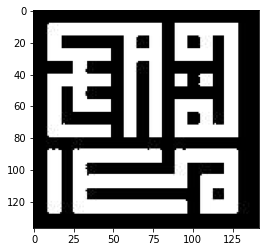

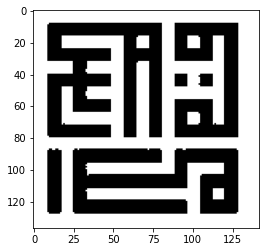

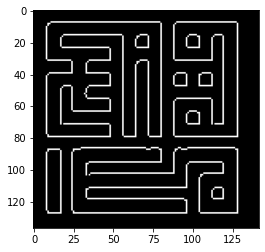

In [72]:
readImagesFromFile("./ACDB/ACdata_base/9/*")

img = Images[1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray ,cmap="gray")
plt.show()
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh,cmap="gray")
plt.show()
edges = cv2.Canny(thresh, 50, 150, apertureSize=3)
plt.imshow(edges, cmap="gray")
plt.show()
# coords = np.column_stack(np.where(thresh > 0))
# print(coords)
# angle = cv2.minAreaRect(coords)[-1]
# print(angle)

# if angle < -45:
#   angle = -(90 + angle)
# else:
#   angle = -angle

# h, w = img.shape[:2]
# center = (w//2, h//2)
# print(angle)
# M = cv2.getRotationMatrix2D(center, angle, 1.0)
# rotated = cv2.warpAffine(
#     img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
# cv2.putText(rotated, 'Angle: {:.2f} degrees'.format(
#     angle), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
# print('angel :{:.3f}'.format(angle))
# plt.imshow(rotated, cmap="gray")
# plt.show()


In [10]:
from sklearn.model_selection import train_test_split
import math
import helpers
import preprocessing
import extract_features

for i in range(1, 10):
    imgsPaths = helpers.getImgsPaths("./ACDB/ACdata_base/"+str(i))
    imgs = []
    #print(imgsPaths)
    for imgPath in imgsPaths:
        imgs.append(helpers.readImageGray(imgPath))
    X_train, X_rem, Y_train, Y_rem = train_test_split(imgs,  train_size=0.6)
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, train_size=0.5)
    print(len(X_train))
    print(len(X_valid))
    print(len(X_test))


ValueError: not enough values to unpack (expected 4, got 2)